
# 🔍 PAN Card Tampering Detection with SSIM & Contour Analysis

This notebook introduces a more **robust approach** to PAN card tampering detection using **Structural Similarity Index (SSIM)** in combination with OpenCV image processing. SSIM provides a perceptual similarity metric between two images, making it better suited than raw subtraction for detecting subtle changes or forgeries.


## 📌 Project Overview

This project demonstrates how to detect tampering in scanned PAN card images using computer vision techniques in Python. It compares an original image with a possibly tampered one and highlights the differences. The project uses OpenCV and image processing steps such as grayscale conversion, image subtraction, thresholding, and contour detection.

Tampering detection like this is useful in:
- Verifying document authenticity
- Fraud detection in ID cards, bank documents, etc.


## 📦 1. Imports & Setup

We use the following libraries:
- `cv2` and `imutils`: for image manipulation
- `PIL`: for image handling
- `requests`, `io`: to handle images from URLs
- `matplotlib.pyplot`: for visualization
- `numpy`: numerical array operations


In [33]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
import imutils
import os
import requests
from PIL import Image

In [34]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering\image

Un sous-r�pertoire ou un fichier pan_card_tampering existe d�j�.
Un sous-r�pertoire ou un fichier pan_card_tampering\image existe d�j�.


In [35]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 


## 📸 2. Load Images

Here we load both the original and the tampered images from disk. Ensure the dimensions match for SSIM comparison.


In [36]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [37]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


In [38]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

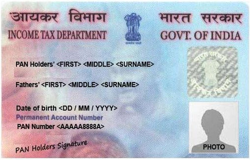

In [39]:
# Display original image
original

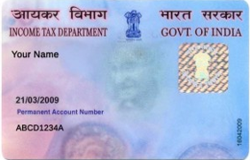

In [40]:
# Display user given image
tampered

In [41]:
# load the two images, convert them to grayscale, and compute the Structural Similarity Index (SSIM)
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')


## 🧪 3. Preprocess Images

We convert both images to grayscale, which simplifies analysis and is required by SSIM.


In [42]:

gray_original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
gray_tampered = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)



## 🧠 4. Compute SSIM (Structural Similarity)

SSIM compares local patterns of pixel intensities. It returns a similarity score and a difference image (diff map).


In [43]:

# Compute SSIM and diff image
(score, diff) = compare_ssim(gray_original, gray_tampered, full=True)
diff = (diff * 255).astype("uint8")

print("SSIM Score:", score)


SSIM Score: 0.31686135690489126



## 🎛️ 5. Threshold the Difference Image

We threshold the `diff` image to isolate significant regions where the images differ.


In [44]:

# Threshold the diff image
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]



## 🔲 6. Detect Contours & Highlight Tampered Areas

We find contours in the thresholded difference image and draw bounding boxes on the tampered image.


In [45]:

# Find contours
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

# Draw rectangles around detected tampered regions
for c in contours:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)


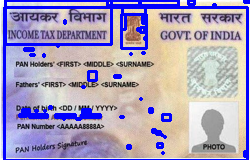

In [46]:
# display the output images
Image.fromarray(original)

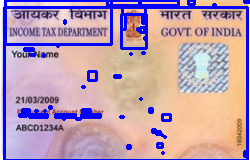

In [47]:
Image.fromarray(tampered)


## 🖼️ 7. Visualize Results

We display the SSIM diff image, threshold map, and final output with detected tampered areas.


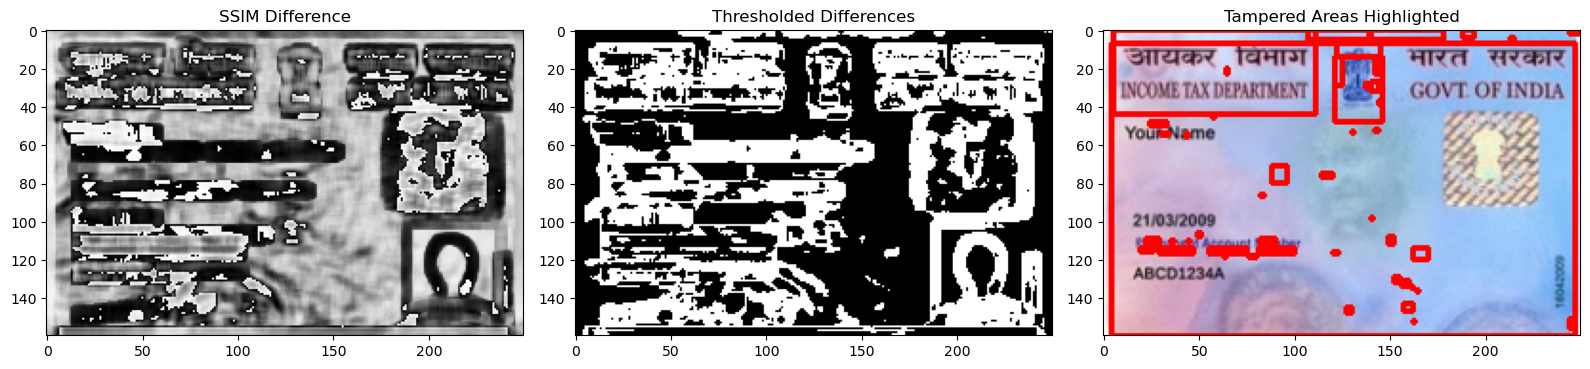

In [48]:

# Display results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(diff, cmap='gray')
plt.title("SSIM Difference")

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Differences")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(tampered, cv2.COLOR_BGR2RGB))
plt.title("Tampered Areas Highlighted")

plt.tight_layout()
plt.show()



## ✅ Conclusion

This notebook presents a more advanced approach to document forgery detection using SSIM combined with OpenCV. The use of perceptual metrics makes the detection more robust to small variations like lighting or compression.

**You can extend this project by:**
- Integrating OCR to detect text tampering
- Using deep learning (CNN) for classification
- Deploying via a Flask web interface for real-time use
